## Imports

In [115]:
#reject OOP, embrace monke
import numpy as np
from numpy import random as rand
import matplotlib.pyplot as plt

## Environment
Because we were given creative freedom, I decided to implement the environent as a singular function, where the bandits are passed as an argument.

In [116]:
def pull(index : int, bandits : list[tuple([float, float])]):
    if index >= len(bandits):
        return -1000
    mean, span = bandits[index]
    return mean + span * 2 *(np.random.rand() - 0.5)

## Training Loop

In [117]:
def train(bandits: list[tuple([float, float])], EPS = 0.1, ITERS = 5000):
    q = [100 for _ in range(bandit_count)]
    rewards = np.zeros(ITERS)

    for i in range(ITERS):
        #exactly 79!
        a = np.argmax(q) if rand.rand() > EPS else rand.randint(0,bandit_count)
        #stored like this for later plotting
        rewards[i] = pull(a, bandits)
        q[a] = q[a] + ALPHA * (rewards[i] - q[a])
    return q, rewards

## Testing Loop

In [118]:

def test(bandits: list[tuple([float, float])], q : list[float], ITERS = 1000):
    rewards = np.zeros(ITERS)
    for i in range(ITERS):
        a = np.argmax(q)
        rewards[i] = pull(a, bandits)
    
    return rewards

## Epsilon experiments
The probability of us choosing an action at random instead of being greedy is defined as `epsilon`.

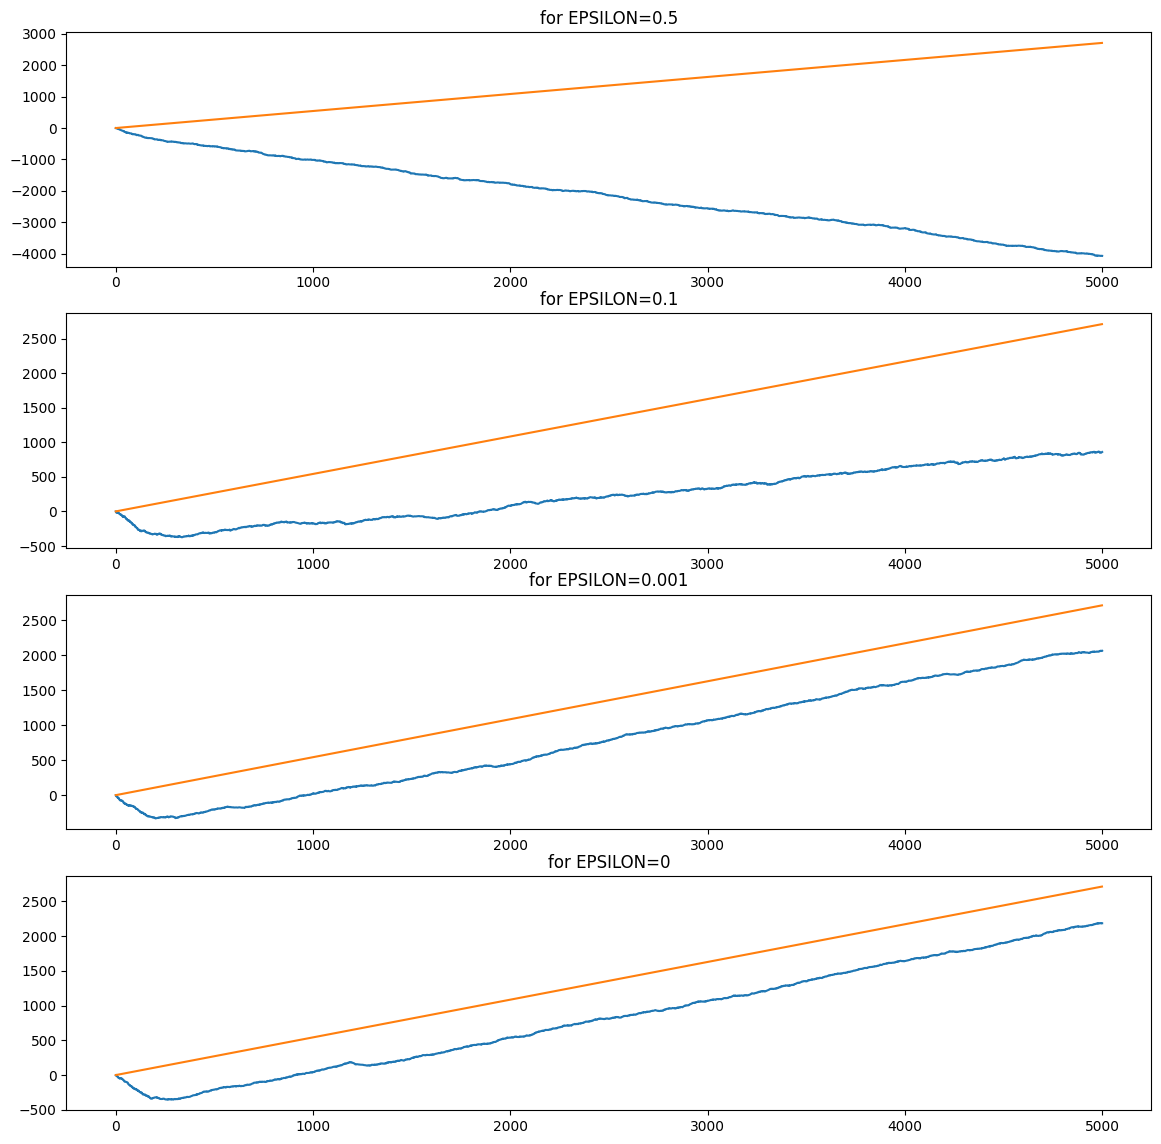

In [119]:
bandit_count = 5
TRAINING_ITERS = 5000
ALPHA = 0.1
# lower epsilon -> random action is less frequent
EPSILONS = [0.5, 0.1, 0.001, 0]

#little hard to read but LESS THAN 79!
bandits = [((np.random.rand() - 0.5) * 10, np.random.rand() * 10) \
for _ in range(bandit_count)] 

best_bandit = max([b[0] for b in bandits])
ideal_gain = np.cumsum(best_bandit * np.ones(TRAINING_ITERS-1))

plot_row = 0

#when i start testing i will save the learnt q's 
testing_q = []

fig, ax = plt.subplots(len(EPSILONS), 1)
fig.set_figwidth(14)
fig.set_figheight(14)

for EPS in EPSILONS:
    q, rewards = train(bandits, EPS)

    ax[plot_row].set_title(f"for EPSILON={EPS}")
    ax[plot_row].plot(np.cumsum(rewards))
    ax[plot_row].plot(ideal_gain)ss

    plot_row += 1
    testing_q.append(q)
plt.show()

From the plots, it can be seen that the slopes of the lines differ less when 
`epsilon` is smaller. This due to the fact that when `epsilon` is a bigger number,
we are more likely to choose a random action or rather pull a lever at random.

One thing to note is that simply setting `epsilon` to zero could potentially lead to missing a "better" bandit at some point, because we are barely exploring the system.

## Testing the training loop
Now that the agent is trained, it is time to see how competent it really is.

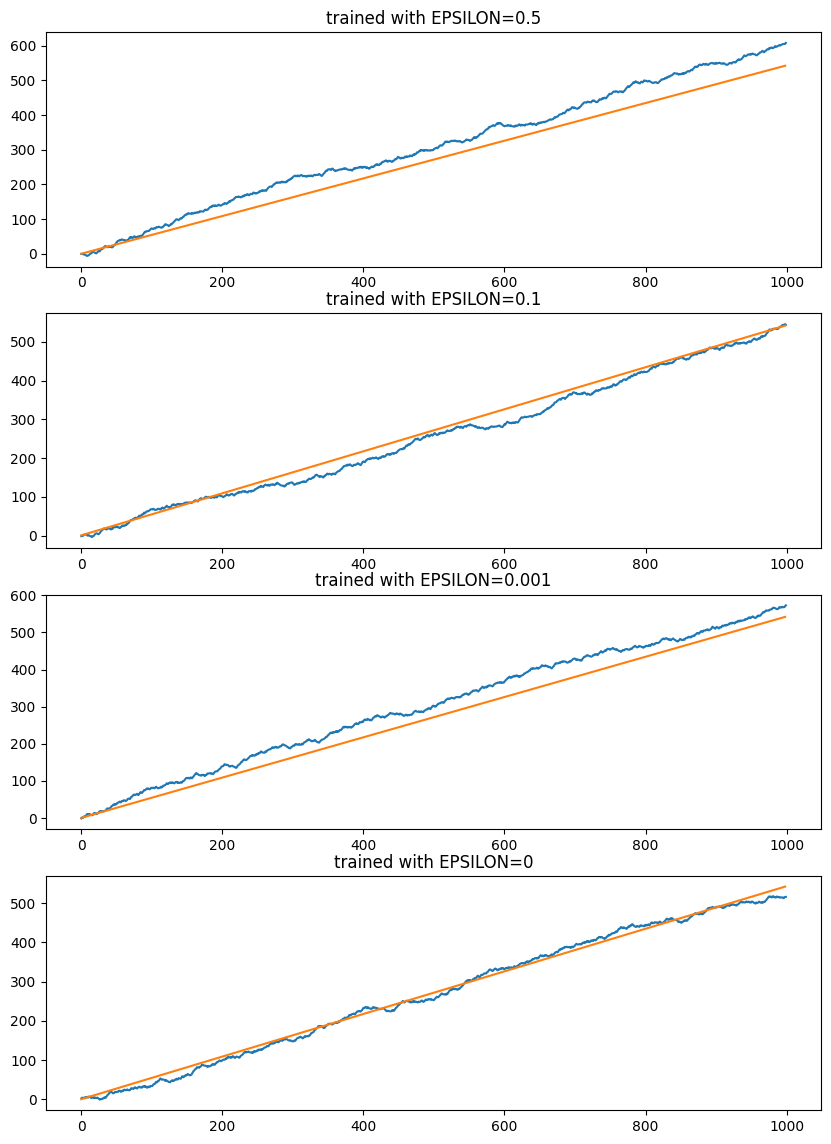

In [120]:

TESTING_ITERS = 1000


best_bandit = max([b[0] for b in bandits])
ideal_gain = np.cumsum(best_bandit * np.ones(TESTING_ITERS-1))

plot_row = 0

fig, ax = plt.subplots(len(testing_q), 1)
fig.set_figwidth(10)
fig.set_figheight(14)

for i in range(len(EPSILONS)):
    rewards = test(bandits, testing_q[i], TESTING_ITERS)

    ax[plot_row].set_title(f"trained with EPSILON={EPSILONS[i]}")
    ax[plot_row].plot(np.cumsum(rewards))
    ax[plot_row].plot(ideal_gain)

    plot_row += 1

plt.show()
    

What can be seen from this, is that the system that did the most exploration usually performs better than the ones that explored less. While it performed way worse than the others during training, it makes up for it by being better than the others (at least most of the time) in exploitation. The reason it is not always better is due to the randomness of the system.